In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[np.where(X_tst.sum(-1) >= 1)] = 0.0
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_uniform_triangle_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_triangle_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_triangle_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000


2019-01-22 14:50:24,794:INFO:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000
2019-01-22 14:50:28,191:INFO:TEST BATCH-0: t = 3.3663, Revenue: 0.247435, Regret: 0.000008, IRP: 0.000000, Welfare: 0.338431
2019-01-22 14:50:28,200:INFO:TEST BATCH-1: t = 3.3711, Revenue: 0.247751, Regret: 0.000004, IRP: 0.000000, Welfare: 0.338579
2019-01-22 14:50:28,208:INFO:TEST BATCH-2: t = 3.3757, Revenue: 0.248070, Regret: 0.000001, IRP: 0.000000, Welfare: 0.338742
2019-01-22 14:50:28,215:INFO:TEST BATCH-3: t = 3.3800, Revenue: 0.248392, Regret: 0.000010, IRP: 0.000000, Welfare: 0.338915
2019-01-22 14:50:28,223:INFO:TEST BATCH-4: t = 3.3843, Revenue: 0.248713, Regret: 0.000026, IRP: 0.000000, Welfare: 0.339097
2019-01-22 14:50:28,230:INFO:TEST BATCH-5: t = 3.3885, Revenue: 0.249032, Regret: 0.000007, IRP: 0.000000, Welfare: 0.339286
2019-01-22 14:50:28,237:INFO:TEST BATCH-6: t = 3.3924, Revenue: 0.249348, Regret: 0.000031, IRP: 0.000000, Welfare: 0.339479
2019-01-22 14:5

2019-01-22 14:50:28,661:INFO:TEST BATCH-65: t = 3.6457, Revenue: 0.256369, Regret: 0.000053, IRP: 0.000000, Welfare: 0.344813
2019-01-22 14:50:28,669:INFO:TEST BATCH-66: t = 3.6506, Revenue: 0.256446, Regret: 0.000070, IRP: 0.000000, Welfare: 0.344894
2019-01-22 14:50:28,676:INFO:TEST BATCH-67: t = 3.6554, Revenue: 0.256521, Regret: 0.000048, IRP: 0.000000, Welfare: 0.344974
2019-01-22 14:50:28,684:INFO:TEST BATCH-68: t = 3.6603, Revenue: 0.256594, Regret: 0.000064, IRP: 0.000000, Welfare: 0.345052
2019-01-22 14:50:28,692:INFO:TEST BATCH-69: t = 3.6654, Revenue: 0.256664, Regret: 0.000119, IRP: 0.000000, Welfare: 0.345128
2019-01-22 14:50:28,699:INFO:TEST BATCH-70: t = 3.6697, Revenue: 0.256731, Regret: 0.000118, IRP: 0.000000, Welfare: 0.345201
2019-01-22 14:50:28,706:INFO:TEST BATCH-71: t = 3.6741, Revenue: 0.256795, Regret: 0.000092, IRP: 0.000000, Welfare: 0.345270
2019-01-22 14:50:28,714:INFO:TEST BATCH-72: t = 3.6784, Revenue: 0.256853, Regret: 0.000088, IRP: 0.000000, Welfare: 0

2019-01-22 14:50:29,033:INFO:TEST BATCH-130: t = 3.8675, Revenue: 0.197463, Regret: 0.000022, IRP: 0.000000, Welfare: 0.282677
2019-01-22 14:50:29,038:INFO:TEST BATCH-131: t = 3.8705, Revenue: 0.194897, Regret: 0.000015, IRP: 0.000000, Welfare: 0.279717
2019-01-22 14:50:29,042:INFO:TEST BATCH-132: t = 3.8732, Revenue: 0.192304, Regret: 0.000046, IRP: 0.000000, Welfare: 0.276709
2019-01-22 14:50:29,047:INFO:TEST BATCH-133: t = 3.8760, Revenue: 0.189685, Regret: 0.000028, IRP: 0.000000, Welfare: 0.273654
2019-01-22 14:50:29,052:INFO:TEST BATCH-134: t = 3.8787, Revenue: 0.187044, Regret: 0.000039, IRP: 0.000000, Welfare: 0.270555
2019-01-22 14:50:29,057:INFO:TEST BATCH-135: t = 3.8815, Revenue: 0.184381, Regret: 0.000049, IRP: 0.000000, Welfare: 0.267413
2019-01-22 14:50:29,061:INFO:TEST BATCH-136: t = 3.8842, Revenue: 0.181699, Regret: 0.000024, IRP: 0.000000, Welfare: 0.264229
2019-01-22 14:50:29,066:INFO:TEST BATCH-137: t = 3.8870, Revenue: 0.179000, Regret: 0.000022, IRP: 0.000000, We

2019-01-22 14:50:29,346:INFO:TEST BATCH-195: t = 4.0645, Revenue: 0.014357, Regret: 0.000000, IRP: 0.000000, Welfare: 0.024493
2019-01-22 14:50:29,350:INFO:TEST BATCH-196: t = 4.0676, Revenue: 0.011486, Regret: 0.000000, IRP: 0.000000, Welfare: 0.019645
2019-01-22 14:50:29,355:INFO:TEST BATCH-197: t = 4.0709, Revenue: 0.008614, Regret: 0.000000, IRP: 0.000000, Welfare: 0.014772
2019-01-22 14:50:29,360:INFO:TEST BATCH-198: t = 4.0738, Revenue: 0.005743, Regret: 0.000000, IRP: 0.000000, Welfare: 0.009873
2019-01-22 14:50:29,365:INFO:TEST BATCH-199: t = 4.0769, Revenue: 0.002872, Regret: 0.000000, IRP: 0.000000, Welfare: 0.004949
2019-01-22 14:50:29,370:INFO:TEST BATCH-200: t = 4.0801, Revenue: 0.000000, Regret: 0.000000, IRP: 0.000000, Welfare: 0.000000
2019-01-22 14:50:29,371:INFO:TEST ALL-400000: t = 4.0801, Revenue: 0.196185, Regret: 0.000030, IRP: 0.000000, Welfare: 0.272110


DEBUG: xsum = 13333.000000


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

In [6]:
from copy import copy
palette = copy(plt.cm.YlOrRd)
palette.set_over('w')
x = np.linspace(0, 1.0, D)
m = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1).reshape(D,D,2)
mask = m.sum(-1)>1.0

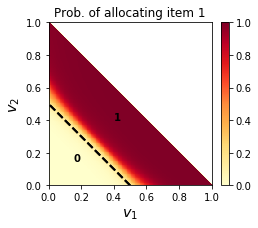

In [7]:
points = [(0.5, 0), (0, 0.5)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = alloc[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

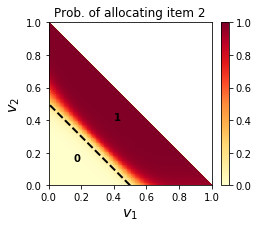

In [8]:
points = [(0.5, 0), (0, 0.5)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a2 = alloc[:, :, 1]
a2[mask] = 10.0
img = ax.imshow(a2[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)


plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)